Siddhant Gupta

50441839

In [54]:
import sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv('song_data.csv')

In [3]:
dataset.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


#### Here Song_name column won't have any effect on the popularity so we can drop the column . 

In [4]:
dataset.drop('song_name', axis=1, inplace=True)

In [5]:
dataset.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
dataset.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


There are no null values in any of the column . 

Now using the cov matrix to see the 

In [10]:
import seaborn as sns

                                       Correlation Matrix                                       


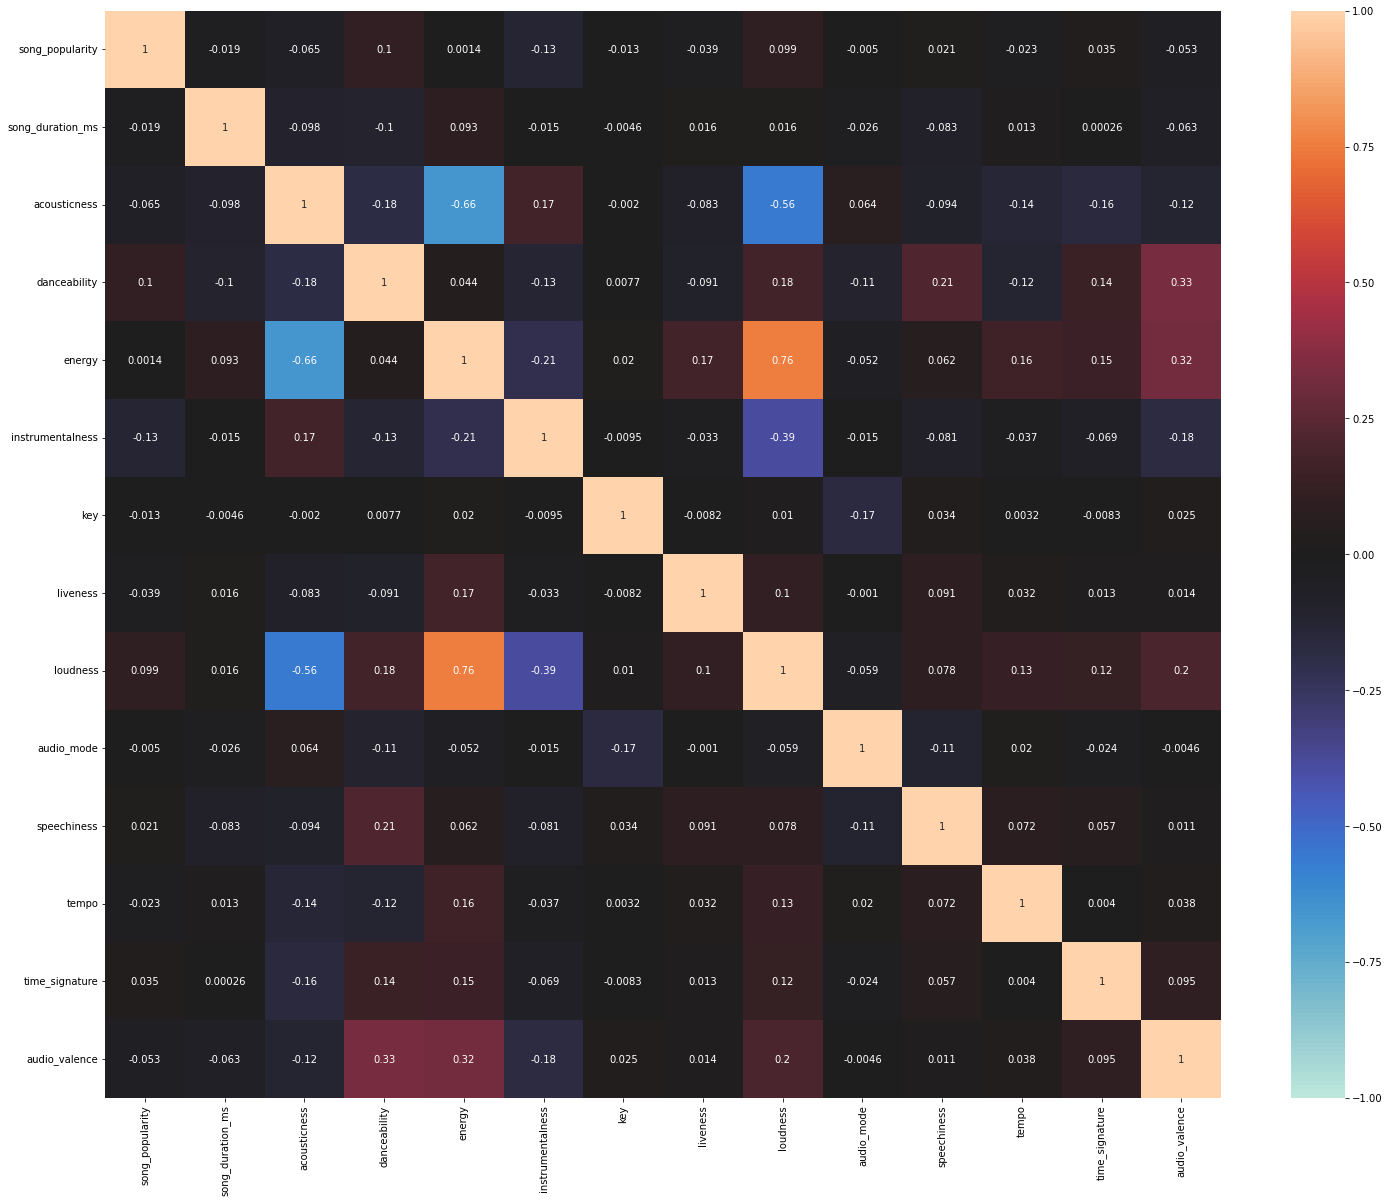

In [11]:
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, center=0) 
plt.show()

We can see that there is not a lot of correlation between the variables and the target variable .


The range of the column song duration is very different from every other column so we normalise the column . 

In [14]:
def min_max_scaling (column) :
                        return (column-column.min()) / (column.max()-column.min())

dataset["song_duration_ms"] = min_max_scaling(dataset["song_duration_ms"])


In [16]:
dataset["tempo"] = min_max_scaling(dataset["tempo"])



In [17]:
dataset.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,0.140059,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,0.689425,4,0.474
1,66,0.114658,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,0.434371,4,0.370
2,76,0.122938,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,0.511233,4,0.324
3,74,0.114658,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,0.505303,4,0.198
4,56,0.118514,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,0.709856,4,0.574


In [23]:
Y = dataset["song_popularity"]

In [25]:
X = dataset.drop('song_popularity', axis=1,)

In [26]:
X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.140059,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,0.689425,4,0.474
1,0.114658,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,0.434371,4,0.370
2,0.122938,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,0.511233,4,0.324
3,0.114658,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,0.505303,4,0.198
4,0.118514,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,0.709856,4,0.574


In [37]:
import sklearn



In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [41]:
Y_pred = regressor.predict(X_test)

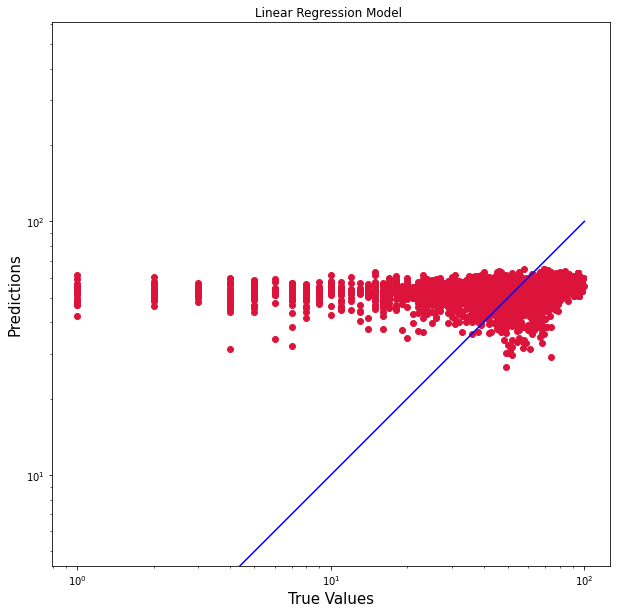

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Y_test), max(Y_pred))
p2 = min(min(Y_test), min(Y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Linear Regression Model ')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [58]:
import sklearn.metrics as metrics
QR_linearreg = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
R2_linearreg = r2_score(Y_test, Y_pred)
cv_r2_scores_lr = cross_val_score(regressor, X_train, Y_train, cv=10,scoring='r2')
print(cv_r2_scores_lr)


[0.04139292 0.05519222 0.04215506 0.05388968 0.04973389 0.03412556
 0.04054382 0.04073563 0.01076644 0.03155619]


In [57]:
print("Mean 10-Fold R Squared: {}".format(np.mean(cv_r2_scores_lr)))

Mean 10-Fold R Squared: 0.04000914044432521


In [65]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(X_train.loc[:,X_train.nunique()>=50].columns.values,3,replace=False)

def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Y_train, x=X_train[i], label='Actual')
        plt.scatter(y=pred1, x=X_train[i], label='Prediction')
        plt.legend()
    plt.show()
    

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -5.67749788  -4.21691556  10.71949012 -11.36817288 -10.85770008
  -0.03048293  -4.62585221   0.67669362   0.06409454  -3.4462637
  -3.19617209   1.30556241  -7.92987438]
The Intercept of the Regresion Model was found to be  63.0590704031101


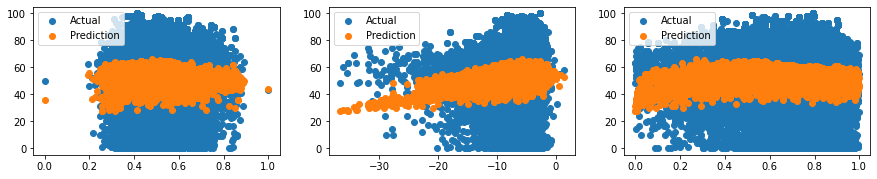

In [66]:
MLR = LinearRegression().fit(X_train,Y_train)
pred1 = MLR.predict(X_train)
pred2 = MLR.predict(X_test)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

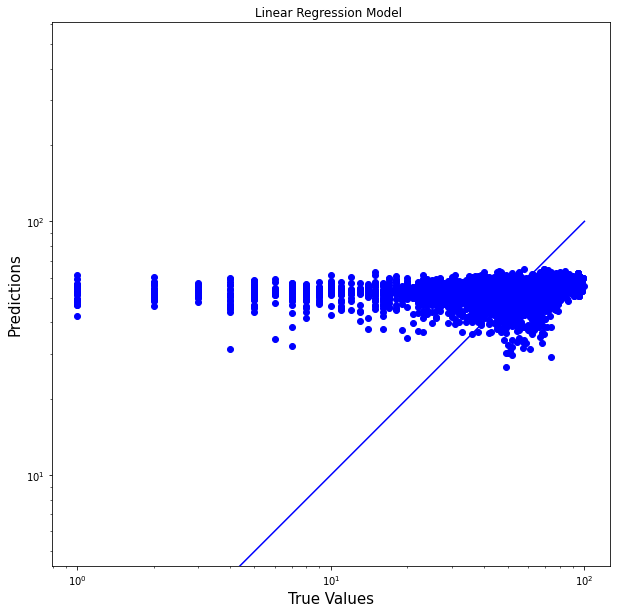

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, pred2, c='blue')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Y_test), max(pred2))
p2 = min(min(Y_test), min(pred2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Linear Regression Model ')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [70]:
QR_linearreg = np.sqrt(metrics.mean_squared_error(Y_test, pred2))
R2_linearreg = r2_score(Y_test, pred2)
cv_r2_scores_lr = cross_val_score(regressor, X_train, Y_train, cv=10,scoring='r2')
print(cv_r2_scores_lr)



[0.04139292 0.05519222 0.04215506 0.05388968 0.04973389 0.03412556
 0.04054382 0.04073563 0.01076644 0.03155619]


The Coeffecient of the Regresion Model was found to be  
[ -5.67749788 , -4.21691556 , 10.71949012 ,-11.36817288 ,-10.85770008
  -0.03048293 , -4.62585221 ,  0.67669362 ,  0.06409454 , -3.4462637
  -3.19617209 , 1.30556241 , -7.92987438 ]

As we can see that some of the features have a low impact on the result so we can drop them 

0.03048293 , 0.06409454

In [78]:
X_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
14422,0.102767,0.07110,0.841,0.808,0.000003,10,0.0816,-5.550,1,0.0749,0.392047,4,0.660
8704,0.092335,0.00127,0.654,0.584,0.000000,6,0.0773,-7.411,0,0.0674,0.659873,4,0.284
12743,0.116123,0.02880,0.803,0.648,0.000000,4,0.0904,-9.185,0,0.1980,0.544429,4,0.538
4769,0.095064,0.64500,0.547,0.289,0.000000,0,0.1480,-8.131,1,0.0348,0.432700,3,0.213
10754,0.057460,0.13000,0.720,0.467,0.959000,9,0.1130,-10.303,1,0.0821,0.354889,4,0.357


Dropping  key and audio_mode features to check the accuracy . 

In [82]:
X_mlr = X_train.drop('key', axis=1,)

In [84]:
X_mlr.drop('audio_mode' , axis =1,inplace = True)

In [85]:
X_mlr.head()


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,audio_valence
14422,0.102767,0.07110,0.841,0.808,0.000003,0.0816,-5.550,0.0749,0.392047,4,0.660
8704,0.092335,0.00127,0.654,0.584,0.000000,0.0773,-7.411,0.0674,0.659873,4,0.284
12743,0.116123,0.02880,0.803,0.648,0.000000,0.0904,-9.185,0.1980,0.544429,4,0.538
4769,0.095064,0.64500,0.547,0.289,0.000000,0.1480,-8.131,0.0348,0.432700,3,0.213
10754,0.057460,0.13000,0.720,0.467,0.959000,0.1130,-10.303,0.0821,0.354889,4,0.357


In [86]:
X_mlr_t = X_test.drop('key', axis=1,)
X_mlr_t.drop('audio_mode' , axis =1,inplace = True)

In [89]:

MLR = LinearRegression().fit(X_mlr,Y_train)
pred1 = MLR.predict(X_mlr)
pred2 = MLR.predict(X_mlr_t)



In [94]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(X_mlr.loc[:,X_mlr.nunique()>=50].columns.values,3,replace=False)

def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Y_train, x=X_mlr[i], label='Actual')
        plt.scatter(y=pred2, x=X_mlr_t[i], label='Prediction')
        plt.legend()
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ -5.6928784   -4.22443398  10.69819145 -11.39480292 -10.85965037
  -4.61291467   0.67692686  -3.5140701   -3.19063352   1.31090364
  -7.93204088]
The Intercept of the Regresion Model was found to be  62.95611373520643


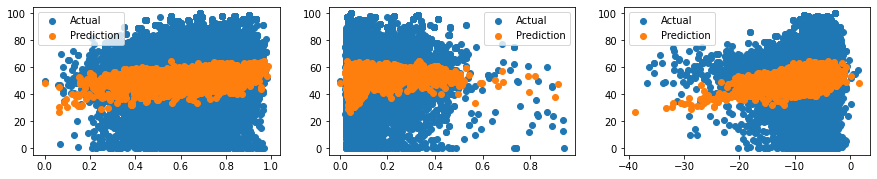

In [95]:
print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

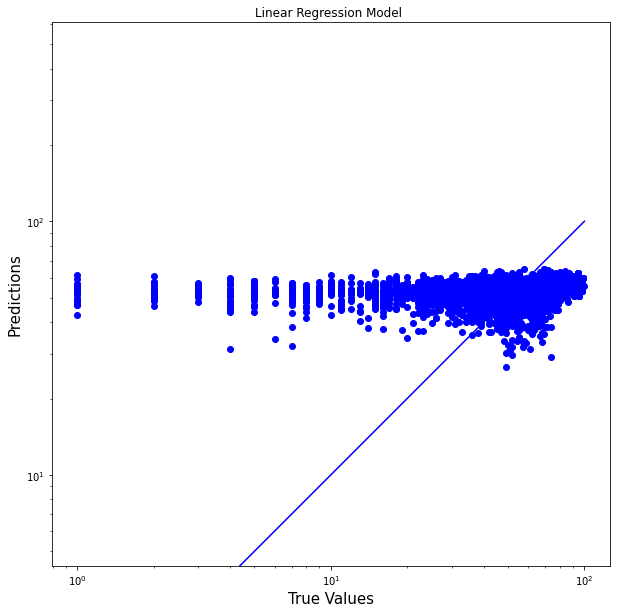

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, pred2, c='blue')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Y_test), max(pred2))
p2 = min(min(Y_test), min(pred2))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Linear Regression Model ')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [97]:
QR_linearreg = np.sqrt(metrics.mean_squared_error(Y_test, pred2))
R2_linearreg = r2_score(Y_test, pred2)
cv_r2_scores_lr = cross_val_score(regressor, X_train, Y_train, cv=10,scoring='r2')
print(cv_r2_scores_lr)



[0.04139292 0.05519222 0.04215506 0.05388968 0.04973389 0.03412556
 0.04054382 0.04073563 0.01076644 0.03155619]


In [98]:
print("Mean 10-Fold R Squared: {}".format(np.mean(cv_r2_scores_lr)))

Mean 10-Fold R Squared: 0.04000914044432521


##### The accuracy remained the same . 

In [99]:
############################


In [100]:
dataset = pd.read_csv('vgsales.csv')

In [101]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Global_Sales - Total worldwide sales. (target Var)

In [102]:
dataset['Rank'].unique

<bound method Series.unique of 0            1
1            2
2            3
3            4
4            5
         ...  
16593    16596
16594    16597
16595    16598
16596    16599
16597    16600
Name: Rank, Length: 16598, dtype: int64>

In [106]:
dataset['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [105]:
dataset['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [107]:
dataset['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [109]:
dataset['Genre'].unique()


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [110]:
dataset['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [111]:
dataset.drop('NA_Sales', axis=1,inplace = True)
dataset.drop('EU_Sales', axis=1,inplace = True)
dataset.drop('JP_Sales', axis=1,inplace = True)
dataset.drop('Other_Sales', axis=1,inplace = True)

In [112]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

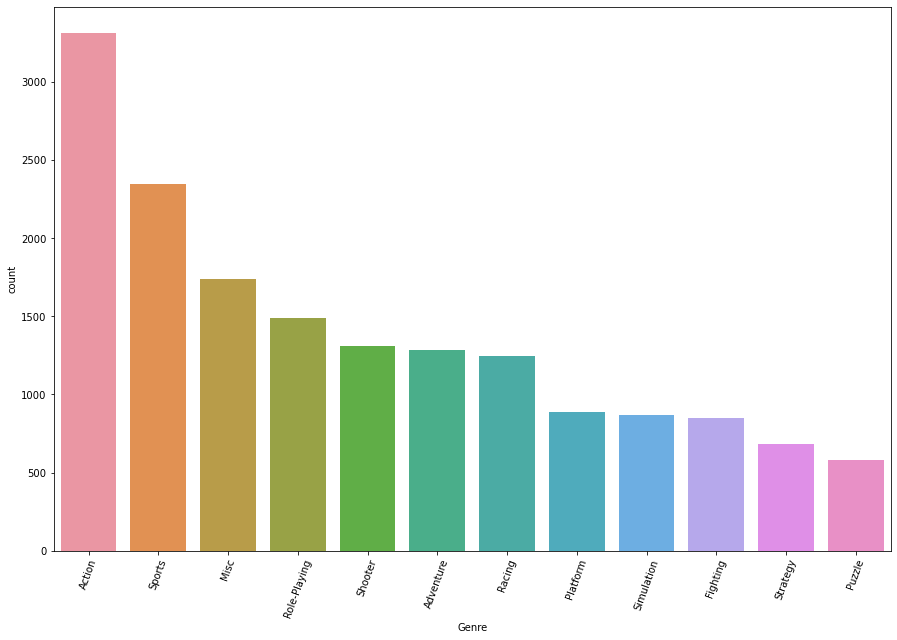

In [116]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=dataset, order = dataset['Genre'].value_counts().index)
plt.xticks(rotation=70)

Action games have the highest count .

In [117]:
data_genre = dataset.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

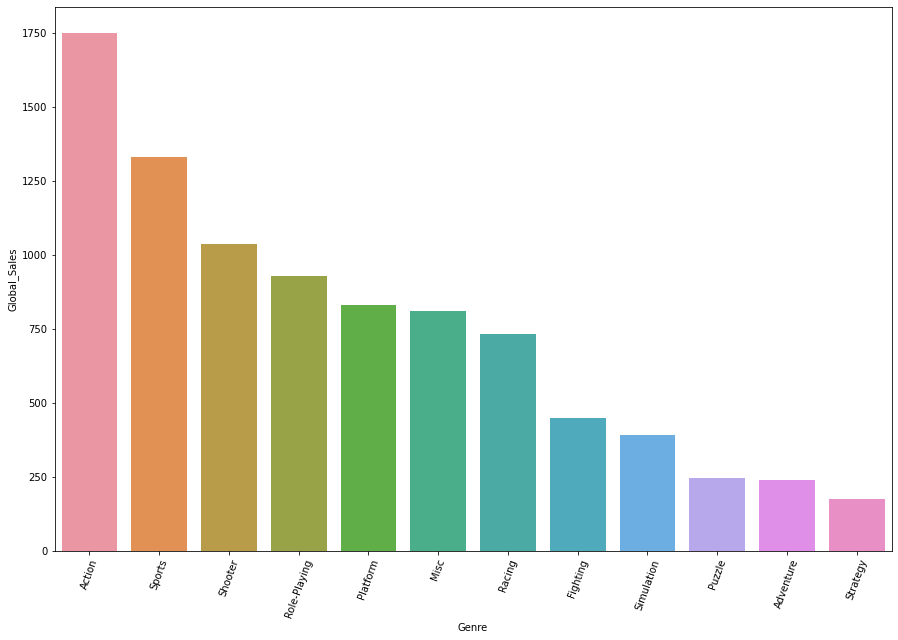

In [119]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=70)

Action and sports have the highest sales .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

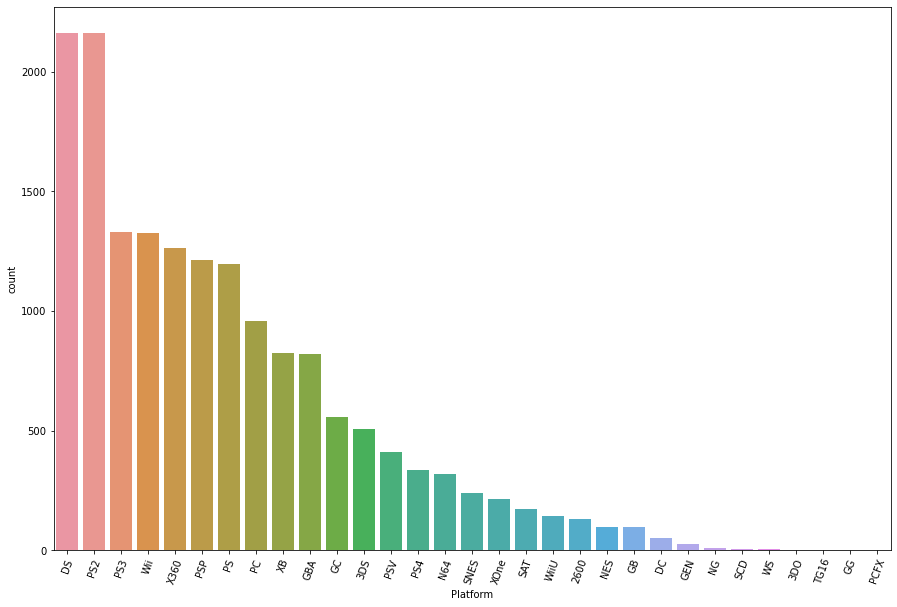

In [121]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform", data=dataset, order = dataset['Platform'].value_counts().index)
plt.xticks(rotation=70)

DS and PS2 have the highest count

In [122]:
data_plat = dataset.groupby(by=['Platform'])['Global_Sales'].sum()
data_plat = data_plat.reset_index()
data_plat = data_plat.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'XB'),
  Text(11, 0, 'GB'),
  Text(12, 0, 'NES'),
  Text(13, 0, '3DS'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

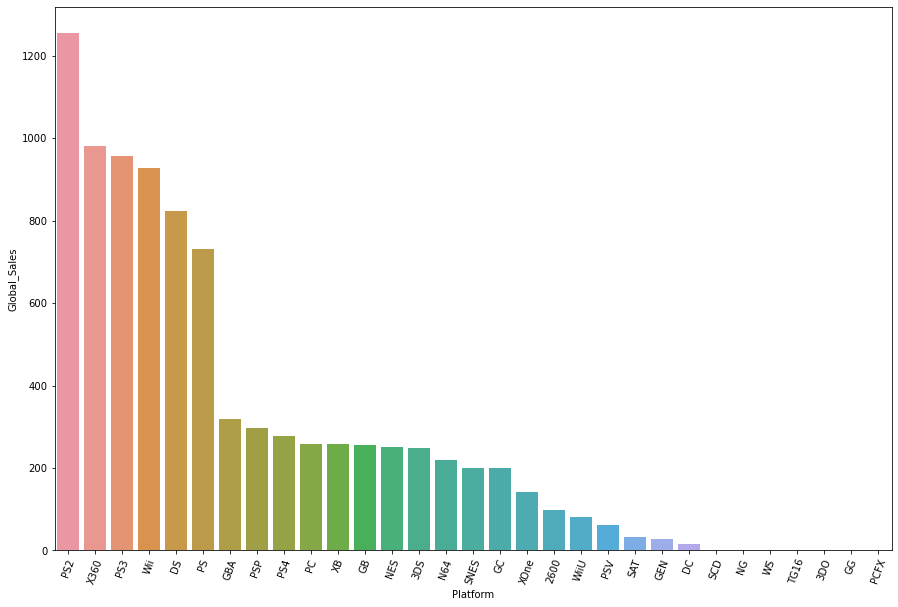

In [123]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_plat)
plt.xticks(rotation=70)

PS2 games have the highest sales . 

In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   Global_Sales  16598 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 907.8+ KB


In [127]:
dataset.dropna(inplace = True)

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   Global_Sales  16291 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1018.2+ KB


In [129]:
df = pd.get_dummies(dataset, columns = ['Platform', 'Genre'])
print(df)

        Rank                                              Name    Year  \
0          1                                        Wii Sports  2006.0   
1          2                                 Super Mario Bros.  1985.0   
2          3                                    Mario Kart Wii  2008.0   
3          4                                 Wii Sports Resort  2009.0   
4          5                          Pokemon Red/Pokemon Blue  1996.0   
...      ...                                               ...     ...   
16593  16596                Woody Woodpecker in Crazy Castle 5  2002.0   
16594  16597                     Men in Black II: Alien Escape  2003.0   
16595  16598  SCORE International Baja 1000: The Official Game  2008.0   
16596  16599                                        Know How 2  2010.0   
16597  16600                                  Spirits & Spells  2003.0   

        Publisher  Global_Sales  Platform_2600  Platform_3DO  Platform_3DS  \
0        Nintendo         82.74  

In [130]:
df.drop('Publisher', axis=1,inplace = True)
df.drop('Name', axis=1,inplace = True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                16291 non-null  int64  
 1   Year                16291 non-null  float64
 2   Global_Sales        16291 non-null  float64
 3   Platform_2600       16291 non-null  uint8  
 4   Platform_3DO        16291 non-null  uint8  
 5   Platform_3DS        16291 non-null  uint8  
 6   Platform_DC         16291 non-null  uint8  
 7   Platform_DS         16291 non-null  uint8  
 8   Platform_GB         16291 non-null  uint8  
 9   Platform_GBA        16291 non-null  uint8  
 10  Platform_GC         16291 non-null  uint8  
 11  Platform_GEN        16291 non-null  uint8  
 12  Platform_GG         16291 non-null  uint8  
 13  Platform_N64        16291 non-null  uint8  
 14  Platform_NES        16291 non-null  uint8  
 15  Platform_NG         16291 non-null  uint8  
 16  Plat

In [132]:
Y= df['Global_Sales']
X = df.drop('Global_Sales', axis=1)

In [135]:
pca = PCA(n_components=45)

In [136]:
pca.fit(X)

PCA(n_components=45)

In [138]:

for i in pca.explained_variance_:
    print(float(i))


22969537.766260765
32.97503721496178
0.1780065371854057
0.14046646030125556
0.12166695555243098
0.1144878390865685
0.10159666599891068
0.08853926677557451
0.08190968155143735
0.07815064548557733
0.07682156613009847
0.07409205654096848
0.06548119448766233
0.06276711856620218
0.061874223831101305
0.05707763377114129
0.053889295802974684
0.05022632458578575
0.047849152848169284
0.04453578187728877
0.038607992422936825
0.035010072925390864
0.034254856046920225
0.02930863724329776
0.025773857047521328
0.021624482199139143
0.017874671818166068
0.014395908357152029
0.012560090996463802
0.009961213183152741
0.008950291484274902
0.006381410587358799
0.00598111969728478
0.003321040290558906
0.002378364011106004
0.0015525580415727117
0.0007451266827407004
0.00039358208525584157
0.00036723941035299204
0.00019005580711334134
0.00012659786983589214
6.512727511469443e-05
6.132390380585939e-05
2.29328332676e-25
2.293283326759999e-25


taking comp = 2

In [139]:
pca = PCA(n_components=2)

In [140]:
pca.fit(X)

PCA(n_components=2)

In [141]:
X_pca = pca.transform(X)

In [142]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (16291, 45)
transformed shape: (16291, 2)


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X_pca, Y, test_size = 1/4, random_state = 0) 

In [146]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

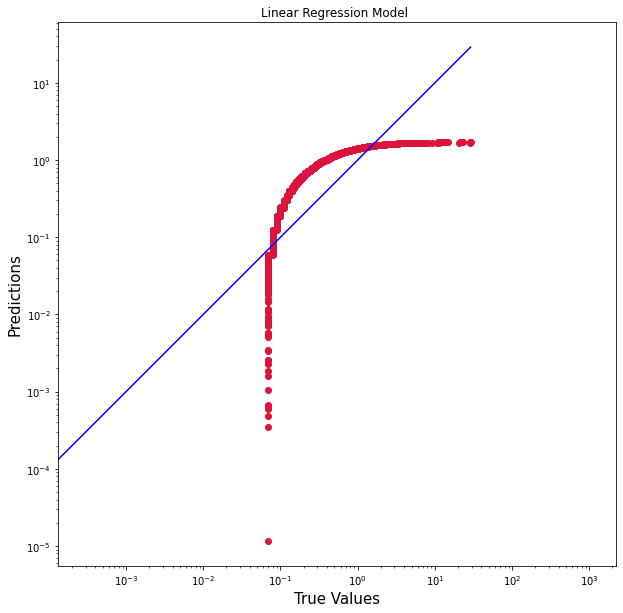

In [147]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Y_test), max(Y_pred))
p2 = min(min(Y_test), min(Y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Linear Regression Model ')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [148]:
QR_linearreg = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
R2_linearreg = r2_score(Y_test, Y_pred)
cv_r2_scores_lr = cross_val_score(regressor, X_train, Y_train, cv=10,scoring='r2')
print(cv_r2_scores_lr)



[0.29733836 0.26133622 0.26325479 0.1745474  0.1614207  0.22031343
 0.14306946 0.24508829 0.31486769 0.07702421]


In [149]:
print("Mean 10-Fold R Squared: {}".format(np.mean(cv_r2_scores_lr)))

Mean 10-Fold R Squared: 0.21582605542520722
